# Performance_score, Confusion Matrix using ROC, AUC score..

In [1]:
# Import Necesaary library :
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Load the digits data :
digit = load_digits()

In [3]:
dir(digit)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
# Create dataframe with target column :
df = pd.DataFrame(digit.data, columns=digit.feature_names)
df["Target"] = digit.target
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,Target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [5]:
digit.data[672]

array([ 0.,  0.,  1., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 12.,  0.,
        0.,  0.,  0.,  0.,  0., 12.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,
       14.,  3.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  9., 12., 10.,  2.,
        0.,  0.,  0., 16., 13.,  8.,  8., 11.,  0.,  0.,  0., 13., 10.,
        4.,  9., 15.,  0.,  0.,  0.,  3., 10., 15.,  9.,  2.,  0.])

In [6]:
# reshape the data into 8x8 :
digit.data[672].reshape(8,8)

array([[ 0.,  0.,  1., 10.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  7., 12.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 12.,  7.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 14.,  3.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 15.,  9., 12., 10.,  2.,  0.],
       [ 0.,  0., 16., 13.,  8.,  8., 11.,  0.],
       [ 0.,  0., 13., 10.,  4.,  9., 15.,  0.],
       [ 0.,  0.,  3., 10., 15.,  9.,  2.,  0.]])

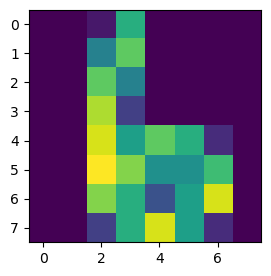

In [7]:
# plot the digit data :
%matplotlib inline
plt.figure(figsize=(3,5))
plt.imshow(digit.data[672].reshape(8,8))    #No. 6
plt.show()

In [8]:
digit.target[672]

6

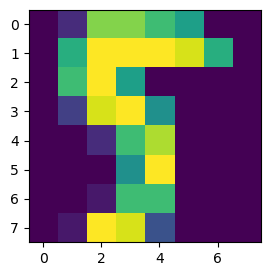

In [9]:
plt.figure(figsize=(3,5))
plt.imshow(digit.data[850].reshape(8,8))     #No. 5
plt.show()

In [10]:
digit.target[850]

5

In [11]:
# Split the data into x and y :
x = df.drop("Target", axis=1)
y = df["Target"]

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=12)

In [14]:
# Import linear model :
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

In [15]:
lg = LogisticRegression()

In [16]:
# fit the model :
lg.fit(x_train, y_train)

LogisticRegression()

In [17]:
# Find score
lg.score(x_train, y_train)

1.0

In [18]:
# Predict the model :
y_pred = lg.predict(x_test)
y_pred

array([2, 8, 7, 0, 2, 1, 8, 8, 9, 1, 5, 9, 2, 2, 1, 2, 0, 7, 7, 2, 4, 4,
       4, 7, 2, 7, 3, 6, 7, 4, 2, 3, 1, 5, 7, 0, 9, 2, 7, 2, 9, 8, 6, 5,
       1, 3, 1, 7, 1, 3, 3, 2, 3, 7, 7, 7, 1, 9, 4, 7, 4, 6, 9, 3, 0, 6,
       2, 3, 6, 0, 9, 7, 2, 0, 1, 2, 3, 3, 0, 9, 8, 1, 9, 8, 9, 4, 5, 6,
       0, 0, 3, 1, 3, 2, 4, 4, 7, 5, 6, 4, 8, 6, 4, 5, 1, 1, 4, 6, 9, 7,
       1, 5, 0, 2, 3, 5, 2, 8, 1, 7, 5, 9, 9, 7, 6, 4, 7, 3, 2, 2, 3, 0,
       0, 4, 0, 0, 5, 8, 5, 6, 4, 8, 6, 0, 7, 7, 4, 9, 4, 2, 3, 6, 7, 5,
       9, 3, 4, 9, 6, 3, 4, 9, 6, 6, 0, 3, 6, 7, 9, 1, 8, 1, 5, 0, 4, 9,
       3, 4, 0, 5, 3, 0, 5, 3, 8, 4, 3, 3, 5, 4, 1, 4, 4, 3, 7, 8, 8, 1,
       7, 8, 5, 0, 5, 3, 7, 0, 4, 1, 3, 1, 9, 5, 9, 9, 8, 3, 0, 9, 2, 0,
       3, 8, 8, 0, 6, 3, 1, 9, 3, 8, 7, 7, 1, 3, 3, 7, 0, 6, 5, 6, 1, 1,
       9, 8, 4, 5, 2, 3, 0, 9, 0, 3, 2, 7, 7, 8, 0, 4, 6, 5, 6, 5, 0, 4,
       2, 4, 6, 0, 3, 0, 6, 3, 8, 3, 7, 2, 6, 1, 4, 1, 7, 6, 4, 2, 7, 3,
       8, 6, 9, 7, 1, 5, 8, 0, 9, 7, 7, 1, 3, 3, 2,

In [19]:
acc_score = accuracy_score(y_pred, y_test)
print(f"𝐀𝐜𝐜𝐮𝐫𝐚𝐜𝐲 𝐒𝐜𝐨𝐫𝐞: ", acc_score)

𝐀𝐜𝐜𝐮𝐫𝐚𝐜𝐲 𝐒𝐜𝐨𝐫𝐞:  0.9685185185185186


In [20]:
conf_matrix = confusion_matrix(y_pred, y_test)
print(f"𝐂𝐨𝐧𝐟𝐮𝐬𝐢𝐨𝐧 𝐌𝐚𝐭𝐫𝐢𝐱: \n", conf_matrix)

𝐂𝐨𝐧𝐟𝐮𝐬𝐢𝐨𝐧 𝐌𝐚𝐭𝐫𝐢𝐱: 
 [[50  0  0  0  0  0  0  0  0  0]
 [ 0 51  1  0  0  0  0  0  2  1]
 [ 0  0 55  0  0  0  0  0  1  0]
 [ 0  1  0 60  0  0  0  0  0  0]
 [ 0  0  0  0 60  0  2  0  0  0]
 [ 0  0  0  0  0 49  0  0  0  0]
 [ 0  0  0  0  0  1 45  0  0  0]
 [ 0  0  0  0  1  0  0 60  1  0]
 [ 0  1  0  0  0  0  0  0 45  0]
 [ 0  0  0  0  1  3  0  1  0 48]]


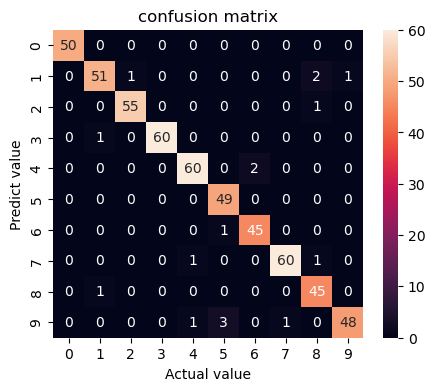

In [21]:
# plot the heatmap :
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True)
plt.xlabel("Actual value")
plt.ylabel("Predict value")
plt.title("confusion matrix")
plt.show()

In [22]:
class_report = classification_report(y_pred, y_test)
print(f"𝐂𝐥𝐚𝐬𝐬𝐢𝐟𝐢𝐜𝐚𝐭𝐢𝐨𝐧 𝐑𝐞𝐩𝐨𝐫𝐭: \n", class_report)

𝐂𝐥𝐚𝐬𝐬𝐢𝐟𝐢𝐜𝐚𝐭𝐢𝐨𝐧 𝐑𝐞𝐩𝐨𝐫𝐭: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      0.93      0.94        55
           2       0.98      0.98      0.98        56
           3       1.00      0.98      0.99        61
           4       0.97      0.97      0.97        62
           5       0.92      1.00      0.96        49
           6       0.96      0.98      0.97        46
           7       0.98      0.97      0.98        62
           8       0.92      0.98      0.95        46
           9       0.98      0.91      0.94        53

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



In [23]:
from sklearn.datasets import make_classification

In [24]:
# Create a data using  make classification :
data = make_classification(n_classes=2, n_features=4, n_informative=2, n_samples=1000, n_clusters_per_class=2)

In [25]:
data

(array([[ 2.92332049e+00, -2.57016635e+00,  2.39790875e+00,
          1.43650341e+00],
        [-8.12481054e-01,  2.98604933e-01, -1.78615116e-01,
         -1.74794194e+00],
        [ 6.67169087e-01, -1.16527468e+00,  1.22634718e+00,
         -1.54959026e+00],
        ...,
        [-2.36826186e-01, -3.22562270e-04,  5.04521004e-02,
         -7.92917798e-01],
        [ 4.75904198e-01, -8.65780613e-01,  9.15341216e-01,
         -1.21749865e+00],
        [ 9.78789037e-01, -7.40674026e-01,  6.62204869e-01,
          8.69859636e-01]]),
 array([1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
        1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
        1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
        1, 1, 1, 0,

In [26]:
# split the data into features and target :
x1 = data[0]
y1 = data[1]

In [27]:
x1_tr, x1_te, y1_tr, y1_te = train_test_split(x1, y1, train_size=0.7, random_state=23)

In [28]:
lr = LogisticRegression()

In [29]:
# same here :
lr.fit(x1_tr, y1_tr)

LogisticRegression()

In [30]:
# Returns probability of each class : 
y_pred_prob = lr.predict_proba(x1_te)

In [31]:
from sklearn.metrics import roc_auc_score, roc_curve

In [32]:
# false positive rate (FPR)
# true positive rate (TPR)
# thresholds (TH)
# pos_label=1 - represent class 1 is a positive class :

fpr, tpr, th = roc_curve(y1_te, y_pred_prob[:,1], pos_label=1)

In [33]:
# find random prob.
random_prob = [0 for i in range(len(y1_te))]

In [34]:
rfpr, rtpr, rth = roc_curve(y1_te, random_prob, pos_label=1)

In [35]:
# find auc_score :
auc_score = roc_auc_score(y1_te, y_pred_prob[:,1])
print("𝐚𝐮𝐜_𝐬𝐜𝐨𝐫𝐞: ", acc_score)

𝐚𝐮𝐜_𝐬𝐜𝐨𝐫𝐞:  0.9685185185185186


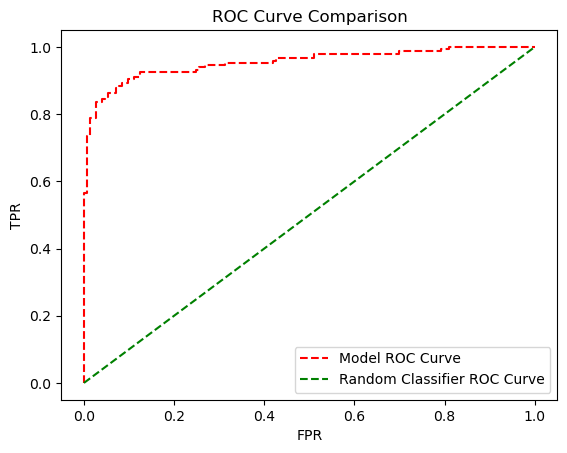

In [36]:
# Plot the graph :
plt.plot(fpr, tpr, linestyle="--", color="red", label="Model ROC Curve")
plt.plot(rfpr, rtpr, linestyle="--", color="green", label="Random Classifier ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve Comparison")
plt.legend(loc="best")
plt.show()